In [23]:
# pip install transformers

In [24]:
# # check scikit-learn version
# import sklearn
# print(sklearn.__version__)

In [34]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

df=pd.read_csv(r'part_1_customerServiceTwitterHandle.csv',sep=',', header=0, low_memory=False)

In [35]:
df.dropna(subset = ['message'], axis = 0, inplace = True)

In [36]:
df['message'].isnull().sum()

0

In [37]:
customer = pd.DataFrame()
customer['message'] = df['message'].copy()

In [38]:
customer.head(20)

,message
0,@1800flowershelp It's Mrs Wright and I no long...
1,@1800flowershelp I did
2,@1800flowershelp It's cool. Still crickets fro...
3,"@1800flowershelp Thanks, Alex. I was fine unti..."
4,@1800flowershelp I ordered flowers for a colle...
5,@1800flowershelp Dm sent
6,@1800flowershelp your service is terrible. I w...
7,@1800flowershelp ðð¾
8,@1800flowershelp DM sent
9,goo.gl/images/KobUwp This is how I feel @1800f...


In [39]:
# pip install nltk

In [40]:
# nltk.download('punkt')

In [41]:
customer_processed = pd.DataFrame(columns = ['message'])

In [43]:
import re
import nltk
for string in customer['message']:
    res = re.sub(r"(?:\@|http?\://|https?\://|www|[^\w\s])\S+", "", string)
    res = re.sub(r"[^\w\s]", "", res)
    res = re.sub(r'\b\w{1,2}\b', "", res)
    tokens = nltk.word_tokenize(res)
    if len(tokens)<=3: continue;
    res = " ".join(tokens)
    customer_processed = customer_processed._append({'message': res}, ignore_index = True)

In [44]:
customer_processed.shape

(25674, 1)

In [45]:
customer_processed['text'] = customer['message']

In [46]:
customer_processed.head()

,message,text
0,Mrs Wright and longer have the information exp...,@1800flowershelp It's Mrs Wright and I no long...
1,cool Still crickets from Really bad,@1800flowershelp I did
2,Thanks Alex was fine until your customer servi...,@1800flowershelp It's cool. Still crickets fro...
3,ordered flowers for colleague who had surgery ...,"@1800flowershelp Thanks, Alex. I was fine unti..."
4,your service terrible will share this experien...,@1800flowershelp I ordered flowers for a colle...


In [47]:
df1=pd.read_csv(r'Non customer tweets.csv',sep=',', header=0, low_memory=False)

In [48]:
df1.dropna(subset = ['message'], axis = 0, inplace = True)

In [49]:
non_customer = pd.DataFrame()
non_customer['message'] = df1['message'].copy()

In [50]:
non_customer['message']

0       I j_u_st ____ entered QVC & HSN's Black Friday...
1       AutoNation $AN PT Lowered to $38.00 at Bucking...
2       Le Chat Noir Thanksgiving Pilgrim available at...
3       Sysco AS,  acquired Basecare #acquisition  #mn...
4       Happy Halloween from the PETTY-est person I kn...
                              ...                        
3144    Gymboree Almost Everything $19.99 and Under. C...
3145    Mason thinks he was born from the land down un...
3146    Thanks to all the pastors and church leaders i...
3147    Clouds alpha Key> shutterstock.com/video/clip-...
3148                    Supporting our #BCreative Sponsor
Name: message, Length: 3146, dtype: object

In [51]:
non_customer_processed = pd.DataFrame(columns = ['message'])

In [52]:
for string in non_customer['message']:
    res = re.sub(r"(?:\@|http?\://|https?\://|www|[^\w\s])\S+", "", string)
    res = re.sub(r"[^\w\s]", "", res)
    res = re.sub(r'\b\w{1,2}\b', "", res)
    tokens = nltk.word_tokenize(res)
    if len(tokens)<=3: continue;
    res = " ".join(tokens)
    non_customer_processed = non_customer_processed._append({'message': res}, ignore_index = True)

In [53]:
# non_customer_processed['text'] = non_customer['message']

In [54]:
non_customer_processed.shape

(2851, 1)

In [55]:
customer_processed['flag'] = '1'

In [56]:
non_customer_processed['flag'] = '0'

In [57]:
data = customer_processed[:3149].copy()

In [60]:
data = data._append(non_customer_processed)

In [61]:
data.shape

(6000, 3)

In [62]:
# data.to_csv('data.csv', index = None)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(data['message'])
vectorizer.vocabulary_

{'Mrs': 3749,
 'Wright': 6199,
 'and': 6522,
 'longer': 10129,
 'have': 9299,
 'the': 12932,
 'information': 9635,
 'experience': 8629,
 'was': 13523,
 'poor': 11145,
 'that': 12929,
 'where': 13602,
 'conversation': 7730,
 'ends': 8487,
 'cool': 7737,
 'Still': 5290,
 'crickets': 7852,
 'from': 8990,
 'Really': 4578,
 'bad': 6789,
 'Thanks': 5535,
 'Alex': 526,
 'fine': 8810,
 'until': 13335,
 'your': 13772,
 'customer': 7908,
 'service': 12139,
 'rep': 11692,
 'called': 7219,
 'this': 12983,
 'could': 7772,
 'barely': 6824,
 'hear': 9319,
 'him': 9380,
 'not': 10625,
 'listening': 10073,
 'what': 13591,
 'telling': 12894,
 'His': 2747,
 'script': 12050,
 'didn': 8127,
 'tell': 12892,
 'how': 9478,
 'respond': 11776,
 'want': 13503,
 'just': 9838,
 'confirm': 7643,
 'address': 6363,
 'ordered': 10774,
 'flowers': 8883,
 'for': 8911,
 'colleague': 7532,
 'who': 13616,
 'had': 9243,
 'surgery': 12753,
 'yesterday': 13762,
 'requested': 11732,
 'they': 12968,
 'delivered': 8029,
 'today'

In [64]:
vectorizer.transform(data['message']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
# text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)

In [66]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, shuffle = True, test_size=0.2)

# from sklearn.model_selection import train_test_split
# train = data.copy()
# test = train['flag']
# train_x, test_x, train_y, test_y = train_test_split(train, test, test_size=0.25, random_state = 1000, shuffle = True)

In [67]:
# train_x = pd.DataFrame()
# train_y = pd.DataFrame()
# test_x = pd.DataFrame()
# test_y = pd.DataFrame()

In [68]:
train_x = pd.DataFrame(train['message'].values, columns=['message'], index=None)
train_y = pd.DataFrame(train['flag'].values, columns=['flag'], index=None)
test_x = pd.DataFrame(test['message'].values, columns=['message'], index=None)
test_y = pd.DataFrame(test['flag'].values, columns=['flag'], index=None)
# train_x = train['message'].values
# train_y = train['flag'].values
# test_x = test['message'].values
# test_y = test['flag'].values

In [69]:
(train_x)

,message
0,local Safeway Did miss Thanksgiving pic
1,didn know Russian bots took the time comment a...
2,your AMZL carrier failed deliver Please help t...
3,Hey why donâ your delivery drivers ring the do...
4,The Pennsylvania Fish and Boat Commission remi...
...,...
4795,You invited zulily zulily
4796,Yeah They gave new date figure Your delivery t...
4797,need info best way use Amazon Fire kids editio...
4798,Thank you The estimated delivery date was Octo...


In [70]:
# train_X = pd.DataFrame()
# train_Y = pd.DataFrame()

In [71]:
# vectorizer.fit(train_x['message'])
train_X = vectorizer.transform(train_x['message'])
test_X = vectorizer.transform(test_x['message'])
test_X

<1200x13797 sparse matrix of type '<class 'numpy.int64'>'
	with 19217 stored elements in Compressed Sparse Row format>

In [72]:
from keras.models import Sequential
from keras import layers
from keras import optimizers 
from keras import losses
from keras import metrics

# # from keras.optimizers import Adam

# input_dim = train_X.shape[1]

# model = Sequential()
# model.add(layers.Dense(10, input_dim = input_dim, activation='relu'))
# model.add(layers.Dense(1, activation = 'sigmoid'))
# model.compile(loss = 'binary_crossentropy', optimizer = 'adam',  metrics = ['accuracy'])
# model.summary()

In [73]:
# train_X.columns
# train_X[train_X.columns] = train_X[train_X.columns].apply(pd.to_numeric, errors='coerce')

In [74]:
# train_X.columns
train_y[train_y.columns] = train_y[train_y.columns].apply(pd.to_numeric, errors='coerce')

In [75]:
# test_X[test_X.columns] = test_X[test_X.columns].apply(pd.to_numeric, errors='coerce')

In [76]:
test_y[test_y.columns] = test_y[test_y.columns].apply(pd.to_numeric, errors='coerce')

In [77]:
train_X = pd.DataFrame(train_X.todense())

In [78]:
test_X = pd.DataFrame(test_X.todense())

In [81]:
# history = model.fit(train_X, train_y, epochs=100, verbose=True, validation_data=(test_X, test_y), batch_size=10)

NameError: name 'model' is not defined

In [80]:
history.history.keys()

NameError: name 'history' is not defined

In [51]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
# plot_history(history)

In [47]:
loss, accuracy = model.evaluate(train_X, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_X, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9458


In [66]:
train_x['message']

0       New eBay Shutterfly 8x8 Photo Book off Shutter...
1       Still not answer the question why does take tw...
2       Episode the Fishing Intelligence Podcast LIVE ...
3       Have asked Amazon reps over the years remove A...
4       said today tomorrow but showed this afternoon ...
                              ...                        
4795    Yes two days row now received confirmations th...
4796    gave Bank permission give you whatever needed ...
4797    Join this weekend team with PetSmart Charities...
4798    Sunday and was supposed arrive yesterday Curre...
4799    JOB Fort Lauderdale USA Senior DBA The Senior ...
Name: message, Length: 4800, dtype: object

# Word embeddings

In [44]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=14000)
tokenizer.fit_on_texts(data['message'])

X_train = tokenizer.texts_to_sequences(train_x['message'])
X_test = tokenizer.texts_to_sequences(test_x['message'])

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(train_x.iloc[2])
print(vocab_size)
print(X_train[2])

message    Episode the Fishing Intelligence Podcast LIVE ...
Name: 2, dtype: object
9731
[1600, 1, 246, 2097, 1183, 239, 2098, 566, 2547, 692, 172, 246, 3, 3337, 24, 8, 1184, 1817, 4771, 693, 1818, 4772, 6, 1817, 1601, 2, 165, 44]


In [45]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[2, :])

[1600    1  246 2097 1183  239 2098  566 2547  692  172  246    3 3337
   24    8 1184 1817 4771  693 1818 4772    6 1817 1601    2  165   44
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


# using Flatten layer 

In [129]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen, trainable=True))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           544700    
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                50010     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 594,721
Trainable params: 594,721
Non-trainable params: 0
_________________________________________________________________


In [130]:
from keras.backend import clear_session
clear_session()

Epoch 1/10
96/96 [==============================] - 1s 10ms/step - loss: 0.6411 - accuracy: 0.6323 - val_loss: 0.5275 - val_accuracy: 0.7283
Epoch 2/10
96/96 [==============================] - 1s 6ms/step - loss: 0.2518 - accuracy: 0.9202 - val_loss: 0.1096 - val_accuracy: 0.9592
Epoch 3/10
96/96 [==============================] - 0s 4ms/step - loss: 0.0481 - accuracy: 0.9854 - val_loss: 0.0852 - val_accuracy: 0.9633
Epoch 4/10
96/96 [==============================] - 0s 4ms/step - loss: 0.0187 - accuracy: 0.9965 - val_loss: 0.0834 - val_accuracy: 0.9667
Epoch 5/10
96/96 [==============================] - 0s 4ms/step - loss: 0.0082 - accuracy: 0.9987 - val_loss: 0.0851 - val_accuracy: 0.9700
Epoch 6/10
96/96 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0835 - val_accuracy: 0.9708
Epoch 7/10
96/96 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0851 - val_accuracy: 0.9700
Epoch 8/10
96/96 [=

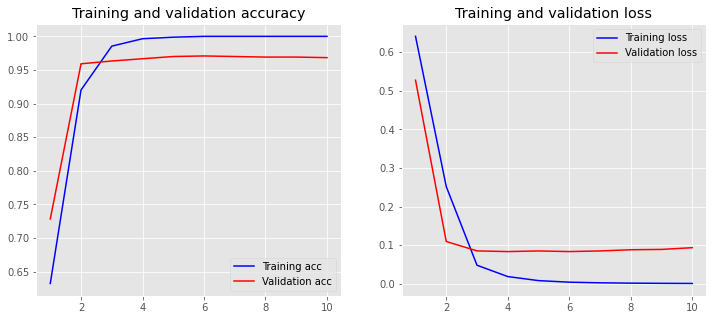

In [131]:
history = model.fit(X_train, train_y,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, test_y),
                    batch_size=50)
loss, accuracy = model.evaluate(X_train, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# using MaxPooling layer

In [135]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen, trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           544700    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 545,221
Trainable params: 545,221
Non-trainable params: 0
_________________________________________________________________


In [136]:
from keras.backend import clear_session
clear_session()

Epoch 1/10
480/480 [==============================] - 3s 5ms/step - loss: 0.4144 - accuracy: 0.8731 - val_loss: 0.1422 - val_accuracy: 0.9525
Epoch 2/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0758 - accuracy: 0.9787 - val_loss: 0.0851 - val_accuracy: 0.9658
Epoch 3/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0248 - accuracy: 0.9948 - val_loss: 0.0728 - val_accuracy: 0.9692
Epoch 4/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0088 - accuracy: 0.9994 - val_loss: 0.0709 - val_accuracy: 0.9700
Epoch 5/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 0.0741 - val_accuracy: 0.9708
Epoch 6/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9708
Epoch 7/10
480/480 [==============================] - 2s 4ms/step - loss: 9.5215e-04 - accuracy: 1.0000 - val_loss: 0.0729 - val_accuracy: 0.9708
Ep

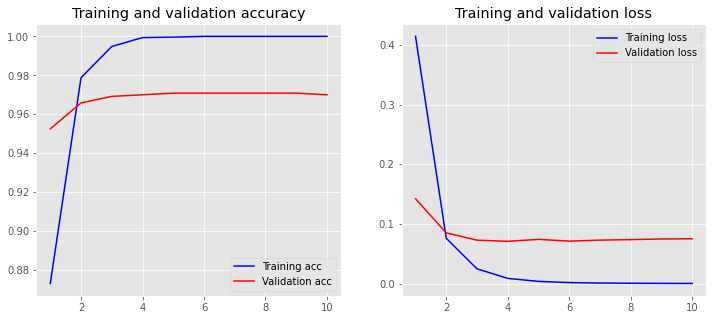

In [137]:
history = model.fit(X_train, train_y,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, test_y),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# GloVe word embeddings from the Stanford NLP Group: NOT downloadable

# CNN

In [166]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen, trainable = True))
model.add(layers.Conv1D(256, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           544700    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 256)           64256     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 611,537
Trainable params: 611,537
Non-trainable params: 0
_________________________________________________________________


In [167]:
from keras.backend import clear_session
clear_session()

Epoch 1/10
96/96 [==============================] - 1s 7ms/step - loss: 0.4591 - accuracy: 0.7583 - val_loss: 0.1315 - val_accuracy: 0.9500
Epoch 2/10
96/96 [==============================] - 1s 5ms/step - loss: 0.0658 - accuracy: 0.9752 - val_loss: 0.0856 - val_accuracy: 0.9600
Epoch 3/10
96/96 [==============================] - 1s 6ms/step - loss: 0.0112 - accuracy: 0.9973 - val_loss: 0.0825 - val_accuracy: 0.9658
Epoch 4/10
96/96 [==============================] - 1s 6ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0875 - val_accuracy: 0.9633
Epoch 5/10
96/96 [==============================] - 1s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9650
Epoch 6/10
96/96 [==============================] - 1s 6ms/step - loss: 5.9042e-04 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9642
Epoch 7/10
96/96 [==============================] - 1s 6ms/step - loss: 3.9141e-04 - accuracy: 1.0000 - val_loss: 0.0975 - val_accuracy: 0.9642
Epoch 8/10
9

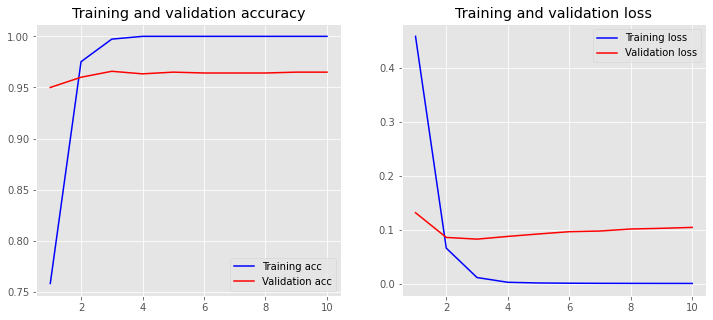

In [168]:
history = model.fit(X_train, train_y,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, test_y),
                    batch_size=50)
loss, accuracy = model.evaluate(X_train, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# LSTM

In [76]:
embedding_dim = 50
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           486550    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 579,499
Trainable params: 579,499
Non-trainable params: 0
_________________________________________________________________


In [77]:
from keras.backend import clear_session
clear_session()

Epoch 1/10
96/96 [==============================] - 34s 339ms/step - loss: 0.6929 - accuracy: 0.5200 - val_loss: 0.6917 - val_accuracy: 0.5333
Epoch 2/10
96/96 [==============================] - 33s 341ms/step - loss: 0.6930 - accuracy: 0.5221 - val_loss: 0.6913 - val_accuracy: 0.5333
Epoch 3/10
96/96 [==============================] - 36s 372ms/step - loss: 0.6923 - accuracy: 0.5227 - val_loss: 0.6910 - val_accuracy: 0.5333
Epoch 4/10
96/96 [==============================] - 40s 415ms/step - loss: 0.6924 - accuracy: 0.5227 - val_loss: 0.6914 - val_accuracy: 0.5333
Epoch 5/10
96/96 [==============================] - 32s 337ms/step - loss: 0.6923 - accuracy: 0.5227 - val_loss: 0.6919 - val_accuracy: 0.5333
Epoch 6/10
96/96 [==============================] - 32s 333ms/step - loss: 0.6923 - accuracy: 0.5227 - val_loss: 0.6911 - val_accuracy: 0.5333
Epoch 7/10
96/96 [==============================] - 32s 338ms/step - loss: 0.6922 - accuracy: 0.5227 - val_loss: 0.6911 - val_accuracy: 0.5333

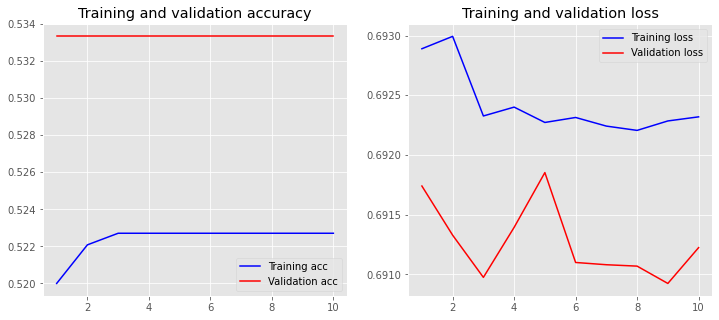

In [78]:
history = model.fit(X_train, train_y,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, test_y),
                    batch_size=50)
loss, accuracy = model.evaluate(X_train, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# LSTM with CNN

In [82]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.LSTM(100))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           486550    
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           4832      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 544,683
Trainable params: 544,683
Non-trainable params: 0
_________________________________________________________________


In [83]:
from keras.backend import clear_session
clear_session()

Epoch 1/10
96/96 [==============================] - 9s 22ms/step - loss: 0.5970 - accuracy: 0.6390 - val_loss: 0.3319 - val_accuracy: 0.8842
Epoch 2/10
96/96 [==============================] - 1s 13ms/step - loss: 0.4381 - accuracy: 0.7860 - val_loss: 0.3797 - val_accuracy: 0.8467
Epoch 3/10
96/96 [==============================] - 1s 12ms/step - loss: 0.2732 - accuracy: 0.9169 - val_loss: 0.2754 - val_accuracy: 0.9192
Epoch 4/10
96/96 [==============================] - 1s 11ms/step - loss: 0.4709 - accuracy: 0.7335 - val_loss: 0.6934 - val_accuracy: 0.5333
Epoch 5/10
96/96 [==============================] - 1s 11ms/step - loss: 0.6948 - accuracy: 0.5115 - val_loss: 0.6908 - val_accuracy: 0.5333
Epoch 6/10
96/96 [==============================] - 1s 11ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6912 - val_accuracy: 0.5333
Epoch 7/10
96/96 [==============================] - 1s 11ms/step - loss: 0.6942 - accuracy: 0.5181 - val_loss: 0.6902 - val_accuracy: 0.5333
Epoch 8/10
96

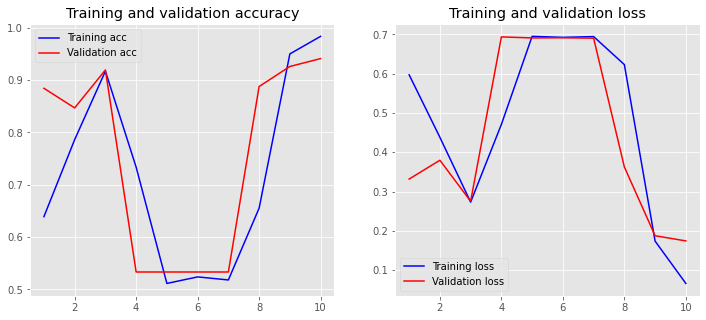

In [84]:
history = model.fit(X_train, train_y,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, test_y),
                    batch_size=50)
loss, accuracy = model.evaluate(X_train, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)